# Lab 0 - Python and Jupyter Notebook Introduction

Spencer Y. Ki

Prof. D. Jones

PHY408H1S

Wednesday, the 18th of January, 2023.

Academic Integrity Disclaimer: I've enrolled in this course before, but unfortunately had to drop out due to scheduling issues. However, I'd already completed and submitted Lab 0 prior to dropping. While I have 're-completed' this lab to account for the modifications to the questions, similarities to my previous work are likely to remain. I would be happy to submit proof of my prior work in case any auto-detected flags are raised. Thank you for marking this!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Warm-up Exercises 

Try the following commands on your jupyter notebook or python editor and see what output they produce.

In [2]:
# a = 1 + 5
# b = 2
# c = a + b
# print(a / b)
# print(a // b)
# print(a - b)
# print(a * b)
# print(a**b)

In [3]:
# a = np.array([[3, 1],
#               [1, 3]])
# b = np.array([[3],
#               [5]])
# print(a * b)
# print(np.dot(a, b))
# print(np.dot(b.T, a))
# c = a**(-1.0)
# print(c * a)

In [4]:
# t = np.arange(10)
# g = np.sin(t)
# h = np.cos(t)
# plt.figure()
# plt.plot(t, g, 'k', t, h, 'r');

# t = np.arange(0, 9.1, 0.1)
# g = np.sin(t)
# h = np.cos(t)
# plt.figure()
# plt.plot(t, g, 'ok', t, h, '+r');

In [5]:
# t = np.linspace(0, 10, 20)
# print(t)
# t = np.logspace(0.001, 10, 9)
# print(t)
# t = np.logspace(-3, 1, 9)
# print(t)
# y = np.exp(-t)

# plt.figure()
# plt.plot(t, y, 'ok')
# plt.figure()
# plt.semilogy(t, y, 'ok')

Student note: Warm-up exercise code was executed as expected and commented out to save PDF space.

# Integration Function

Here is a more complicated function that computes the integral $y(x)$ with interval $dx$:

$$c = \int y(x) dx \sim \sum_{i=1}^N y_i dx_i .$$

It can deal with both cases of even and uneven sampling.

In [6]:
def integral(y, dx):
    # function c = integral(y, dx)
    # To numerically calculate integral of vector y with interval dx:
    # c = integral[ y(x) dx]
    # ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ’==’, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
    # x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
    # If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c


Use this function (`integral`) to compute $\int_0^{\pi/2} \cos(t) dt$
with an evenly sampled time series.

0.9974602317917262


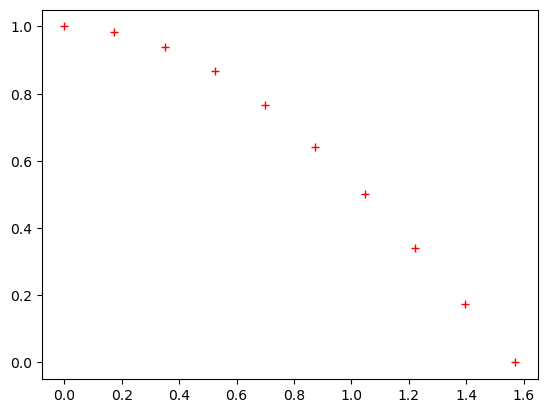

In [7]:
# number of samples
nt = 10
# generate time vector
t = np.linspace(0, np.pi/2, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

## Part 1

First plot $y(t)$. Is the output $c$ value what you are expecting for
$\int_0^{\pi/2} \cos(t) dt$? How can you improve the accuracy of your computation?

Collaborators: None

Student response: $y(t)$ has been plotted above, and the resultant $c = 0.9974602317917262$ is acceptably close to the true mathematical value of $\int_0^{\pi/2} \cos(t) dt = 1$. Regarding accuracy, one could compare the provided integral function to a Riemann sum — both operate by repeatedly summing rough 'areas under the curve' over small intervals of the function. Accordingly, just as a Riemann sum's accuracy is improved with shorter intervals, a better numerical approximation can be derived computationally with thinner slices. This would be implemented by taking a larger number of samples over the same domain. The resultant increase in accuracy can be seen in the figure below, which uses an $nt$ value of 1000 and results in a closer numerically-calculated integral to the true value of 1.

0.9999997939713805


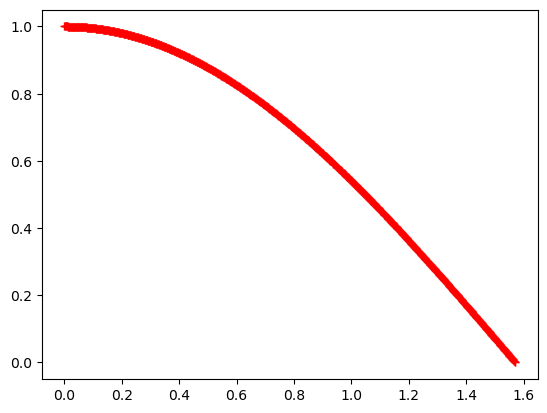

In [8]:
# number of samples
nt = 1000
# generate time vector
t = np.linspace(0, np.pi/2, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

## Part 2

For an unevenly spaced time series that depicts $\sin[(2 \pi (t+ 3t^2)]$ (so-called chirp function),
compute $\int_0^1 \sin[(2 \pi (t+ 3t^2)] dt$.

Collaborators: None

0.08673999688870114


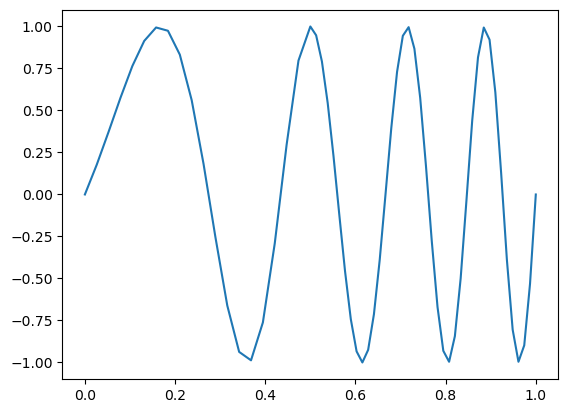

In [9]:
nt = 20
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * (t + 3*t**2))
plt.plot(t, y)
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

Show your plot of $y(t)$ for $nt = 50$. Try different $nt$ values and see
how the integral results change. Write a `for` loop around the statements above to try
a series of $nt$ values (e.g, 50, 100, 500, 1000, 5000) and generate a plot of $c(nt)$.
What value does $c$ converge to after using larger and larger $nt$? (Please include your
modified Python code.)

As the value of nt increases, the following trend in c is observed:
[0.08653435 0.08650505 0.08649566 0.08649536 0.08649527]


Text(0, 0.5, 'c')

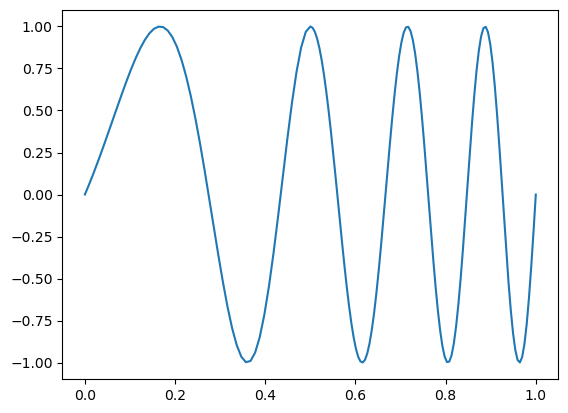

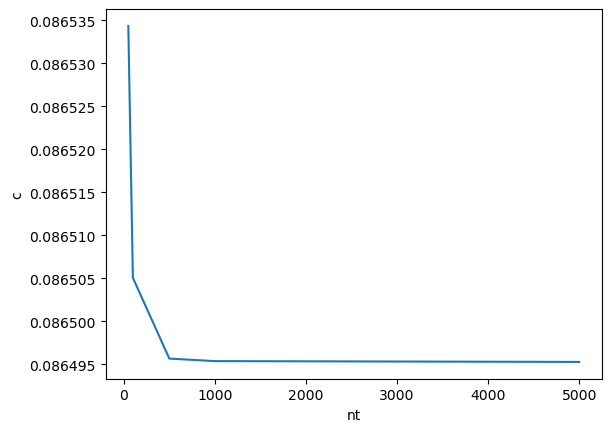

In [10]:
# nt values to loop around
nts = np.array([50, 100, 500, 1000, 5000])
# array to hold values of c for each nt value
cs = np.array([])
# integral for loop
for nt in nts:
    # sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
    # double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
    # concatenate time vector
    t = np.concatenate((t1[:-1], t2))
    # compute y values (f=2t)
    y = np.sin(2 * np.pi * (t + 3 * t**2))
    # plot of y(t) for nt = 50, as requested
    if nt == 50:
        plt.figure()
        plt.plot(t, y)
    # compute sampling interval vector
    dt = t[1:] - t[:-1]
    c = integral(y, dt)
    cs = np.append(cs, c)
# print array of c values
print("As the value of nt increases, the following trend in c is observed:")
print(cs)
# plot c(nt)
plt.figure()
plt.plot(nts, cs)
plt.xlabel("nt")
plt.ylabel("c")

Student response: Plotting the integrals $c$ as a function of $nt$ values, one sees that $c$ rapidly converges to roughly 0.0865 as $nt$ increases.

# Accuracy of Sampling

Let us sample the function $g(t) = \cos(2 \pi f t)$ at sampling interval $dt = 1$, for frequency values of
$f = 0, 0.25, 0.5, 0.75, 1.0$ hertz.

In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates $g(t)$ (plotted as a blue-dotted line, try a very small $dt$ fine
sampling). Submit only plots for frequencies of $0.25$ and $0.75$
Hertz, use xlabel, ylabel, title commands to annotate each plot.
For each frequency that you investigated, do you think the sampling time series is a fair representation of
the original time series $g(t)$? What is the apparent frequency for the sampling time series? (Figure out
after how many points ($N$) the series repeats itself, then the apparent frequency = $1/(N*dt)$. You can do this either
mathematically or by inspection. A flat time series has apparent frequency = 0.) Can you guess with a
sampling interval of $dt = 1$, what is the maximum frequency $f$ of $g(t)$
such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

Collaborators: None

Text(0.5, 1.0, 'Sampling Time Series vs g(t), Frequency = 0.25')

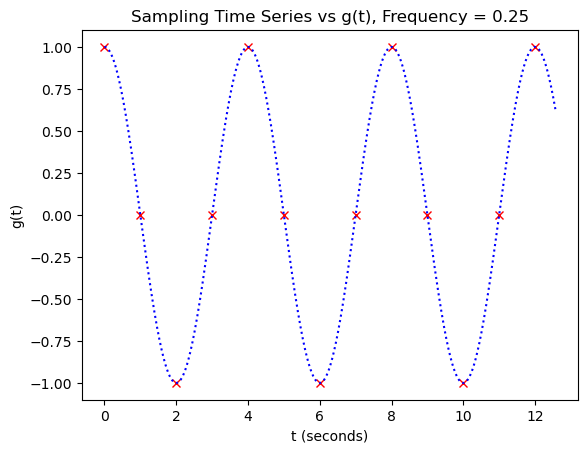

In [11]:
dt = 1
t = np.arange(0, 4*np.pi, dt)
g = np.cos(2 * np.pi * 0.25 * t)
plt.plot(t, g, 'rx')

nt = 0.00001
t = np.arange(0, 4*np.pi, nt)
g = np.cos(2 * np.pi * 0.25 * t)
plt.plot(t, g, 'b:')

plt.xlabel("t (seconds)")
plt.ylabel("g(t)")
plt.title("Sampling Time Series vs g(t), Frequency = 0.25")

Text(0.5, 1.0, 'Sampling Time Series vs g(t), Frequency = 0.75')

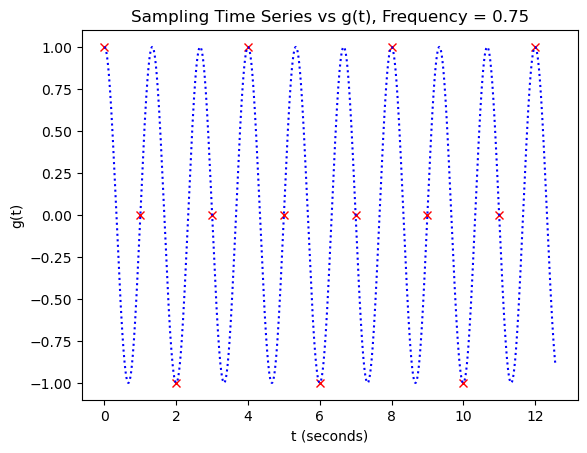

In [12]:
dt = 1
t = np.arange(0, 4*np.pi, dt)
g = np.cos(2 * np.pi * 0.75 * t)
plt.plot(t, g, 'rx')

nt = 0.00001
t = np.arange(0, 4*np.pi, nt)
g = np.cos(2 * np.pi * 0.75 * t)
plt.plot(t, g, 'b:')

plt.xlabel("t (seconds)")
plt.ylabel("g(t)")
plt.title("Sampling Time Series vs g(t), Frequency = 0.75")

Student response: Plotting sampling time series with frequencies of 0, 0.25, and 0.5 hertz yields plots with apparant frequencies also of 0, 0.25, and 0.5 hertz, respectively. Accordingly, these sampling time series fairly representing $g(t)$.

On the other hand, plotting a sampling time series with a frequency of 1.0 hertz yields a plot with an apparent frequency of 0 hertz. Similarly, plotting a sampling time series with a frequency of 0.75 hertz yields a plot with an apparent frequency of 0.25 hertz. These discrepancies have been determined by inspection.

Based on these observations, one can conclude that 0.5 hertz is the maximum frequency for which a discrete time series can fairly represent $g(t)$ with a sampling interval of $dt = 1$.